In [1]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from matplotlib import pyplot as plt
%matplotlib inline  


## Capturing Video and Saving 

In [ ]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Video.avi',fourcc,20.0())

In [2]:
detector = dlib.get_frontal_face_detector()


In [5]:
predictor = dlib.shape_predictor("data/shape_predictor_68_face_landmarks.dat")


In [16]:
seinfeld = cv2.imread('Bilder/Seinfeld.jpg')


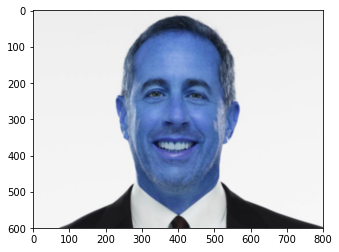

In [18]:
seinfeld = imutils.resize(seinfeld, width=500)

In [20]:
gray = cv2.cvtColor(seinfeld, cv2.COLOR_BGR2GRAY)


In [21]:
rects = detector(gray, 1)

In [22]:
image = seinfeld

In [23]:
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)


In [24]:
cv2.imshow("Output", image)
cv2.waitKey(0)

113